KNN-Classifier

In [1]:
%pip install fast-ml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [3]:
train_dataset = pd.read_csv('updated_train.csv')
label_encoder = LabelEncoder()
train_dataset['Sex'] = label_encoder.fit_transform(train_dataset['Sex'])

In [4]:
# hyperparameter optemization
from sklearn.model_selection import GridSearchCV
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(train_dataset, target = 'Survived', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)


In [5]:
#defining and Fitting KNN model
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
rounded_KNN = round(classifier.score(X_train, y_train)*100, 2)
print(rounded_KNN)

85.07


In [7]:
#Tuning the hyperparameters
grid_params = { 'n_neighbors' :[i for i in range (1,624,2)],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=20, n_jobs = -1 ,scoring=["accuracy","f1","precision","recall","roc_auc"] , refit = 'accuracy' )

g_res = gs.fit(X_valid, y_valid)
g_res.best_score_

Fitting 20 folds for each of 1872 candidates, totalling 37440 fits


0.8130952380952381

In [8]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'distance'}

In [9]:
y_pred = g_res.predict(X_test)

In [10]:
# precesion score
from sklearn.metrics import precision_score
print("Precesion Score:",precision_score(y_test, y_pred, average='macro'))

Precesion Score: 0.7467595989239423


In [11]:
# Recall Score
from sklearn.metrics import recall_score
print("Recall Score:",recall_score(y_test, y_pred, average='macro'))

Recall Score: 0.7335648148148148


In [12]:
# F1-Score
from sklearn.metrics import f1_score
print("F1-Score:",f1_score(y_test, y_pred, average='macro'))

F1-Score: 0.7378312681567558


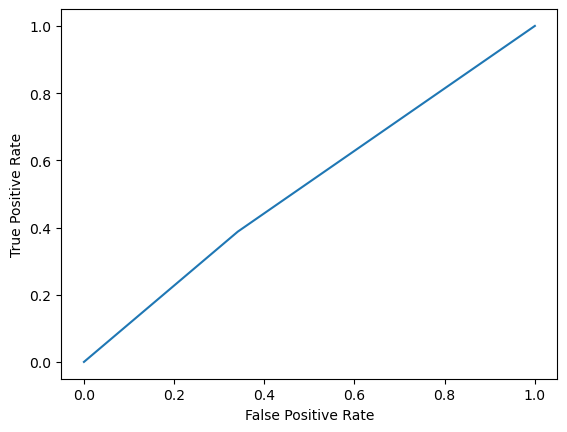

In [102]:
# ROC/AUC Curves
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y_test,y_pred)

In [13]:
# ROC AUC Score 
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_pred)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7335648148148148


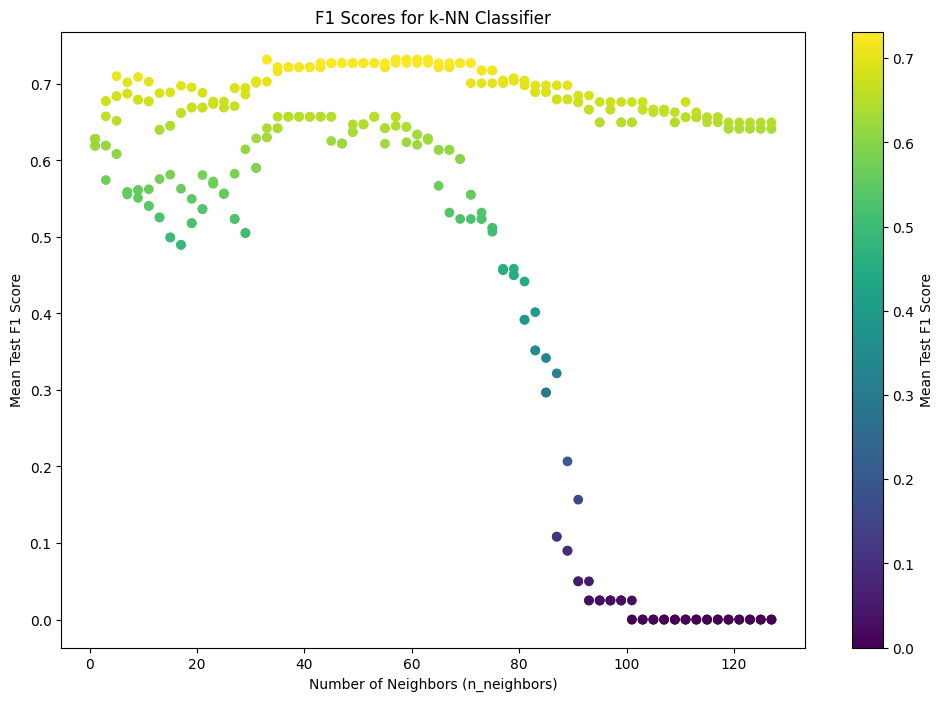

In [15]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_f1']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
n_neighbors_values = [param['n_neighbors'] for param in params]

# Create a 2D scatter plot to visualize the F1 scores
plt.figure(figsize=(12, 8))
plt.scatter(n_neighbors_values, f1_scores, c=f1_scores, cmap='viridis', marker='o')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test F1 Score')
plt.title('F1 Scores for k-NN Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test F1 Score')

plt.show()

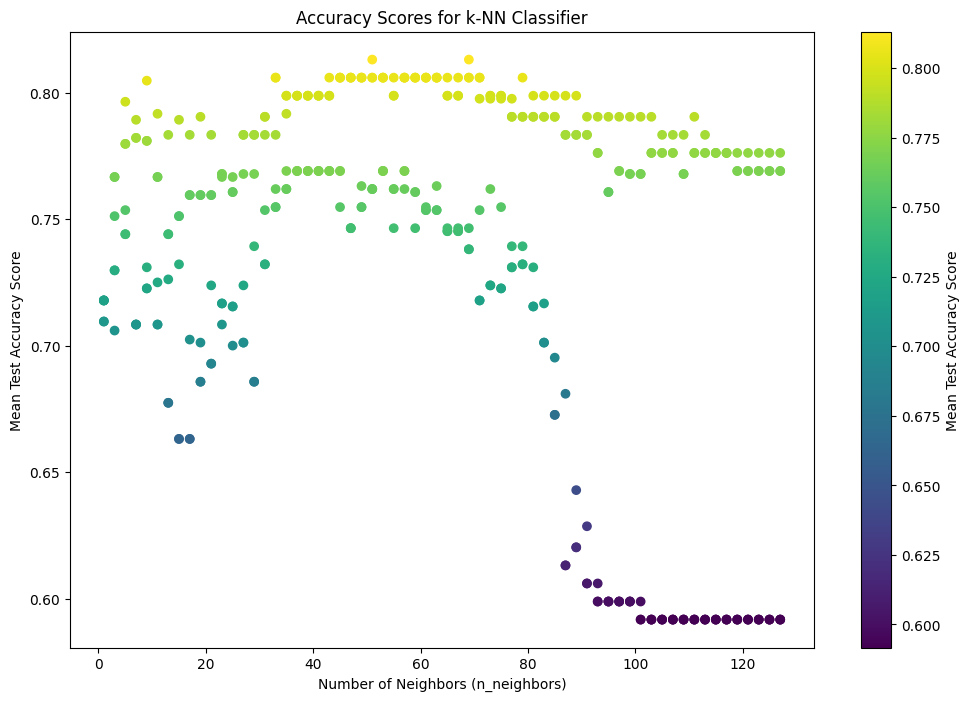

In [17]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_accuracy']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
n_neighbors_values = [param['n_neighbors'] for param in params]

# Create a 2D scatter plot to visualize the F1 scores
plt.figure(figsize=(12, 8))
plt.scatter(n_neighbors_values, f1_scores, c=f1_scores, cmap='viridis', marker='o')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Accuracy Score')
plt.title('Accuracy Scores for k-NN Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test Accuracy Score')

plt.show()

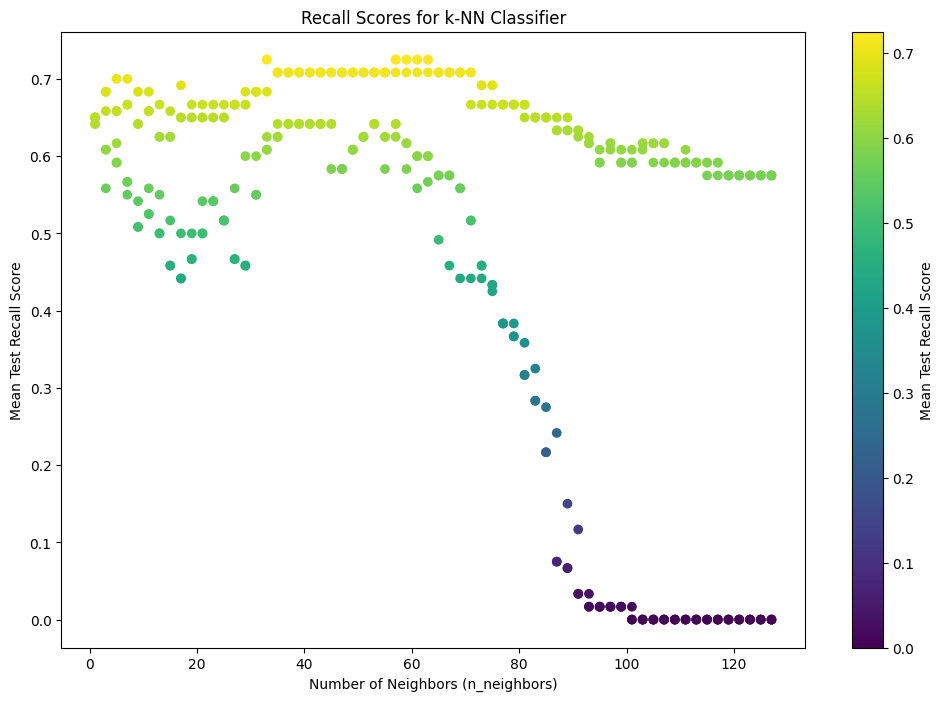

In [18]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_recall']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
n_neighbors_values = [param['n_neighbors'] for param in params]

# Create a 2D scatter plot to visualize the F1 scores
plt.figure(figsize=(12, 8))
plt.scatter(n_neighbors_values, f1_scores, c=f1_scores, cmap='viridis', marker='o')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Recall Score')
plt.title('Recall Scores for k-NN Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Mean Test Recall Score')

plt.show()

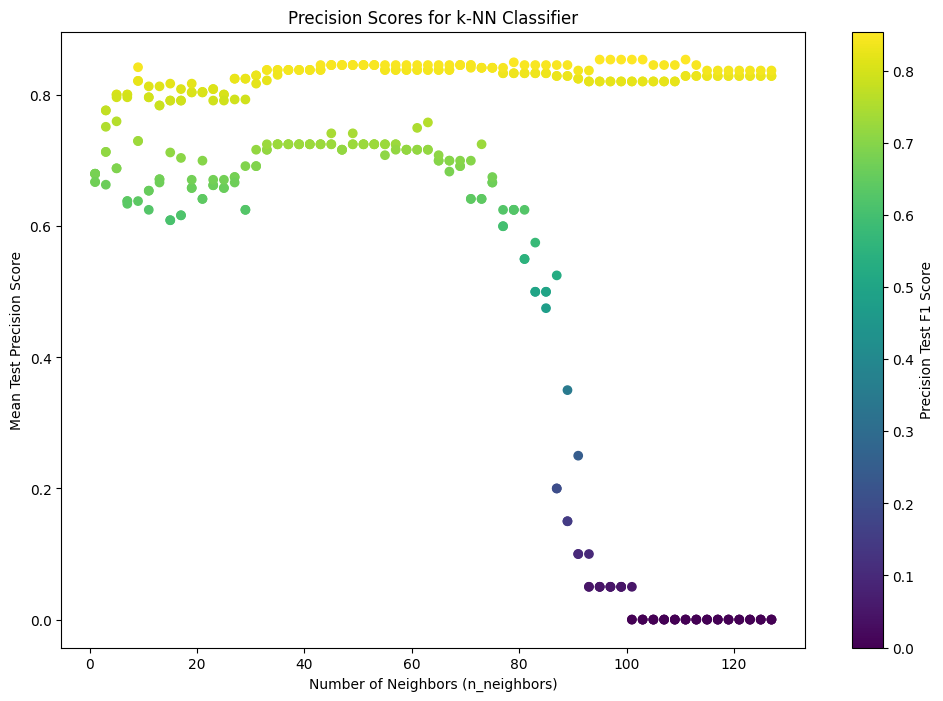

In [19]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_precision']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
n_neighbors_values = [param['n_neighbors'] for param in params]

# Create a 2D scatter plot to visualize the F1 scores
plt.figure(figsize=(12, 8))
plt.scatter(n_neighbors_values, f1_scores, c=f1_scores, cmap='viridis', marker='o')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Precision Score')
plt.title('Precision Scores for k-NN Classifier')

# Add a colorbar to the right of the plot
cbar = plt.colorbar()
cbar.set_label('Precision Test F1 Score')

plt.show()